In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from epimodels.continuous.models import SIR
from epimodels.continuous.models import SEQIAHR
import numpy as np
from IPython.display import Markdown as md

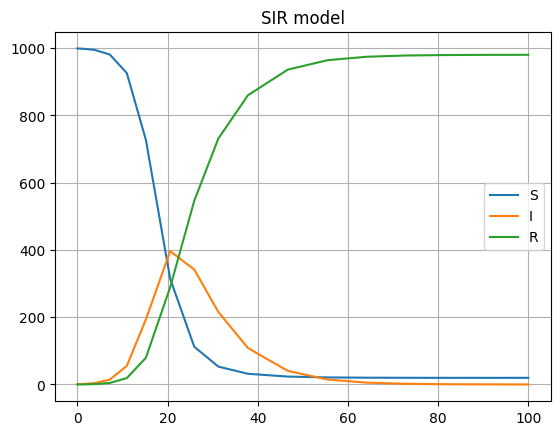

In [2]:
# for the explanation
model = SIR()
pop = 1000
days = 100
I = 1
R = 0
S = pop - I -R
beta = 0.5
gamma = 0.125
model([S, I, R], [0, days], pop, {'beta': beta, 'gamma': gamma})
model.plot_traces()

In [ ]:
# interaction prototype

def run_sir_model(population=1000, I = 1, beta=2.0, gamma=0.1, days=50):
    R = 0
    S = population - I - R

    model = SIR()
    t_span = [0, days]
    model([S, I, R], t_span, population, {'beta': beta, 'gamma': gamma})
    model.plot_traces()
    plt.show()

interact(
    run_sir_model,
    population=IntSlider(value=10000, min=1000, max=100000, step=1000, description='Population'),
    I=IntSlider(value=1, min=1, max=10000, step=5, description='Infected'),
    beta=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Beta'),
    gamma=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Gamma'),
    duration=IntSlider(value=50, min=10, max=200, step=5, description='Days')
)

interactive(children=(IntSlider(value=10000, description='Population', max=100000, min=1000, step=1000), IntSl…

<function __main__.run_sir_model(population=1000, I=1, beta=2.0, gamma=0.1, days=50)>

In [4]:
# plot simulation results

def plot_sim(a):
    '''same as plot_traces'''
    S, I, R = a.y
    t = a.t

    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

def plot_sim(a, ax):
    '''same as plot_traces, but works with subplots'''
    S, I, R = a.y
    t = a.t

    ax.plot(t, S, label="Susceptible")
    ax.plot(t, I, label="Infected")
    ax.plot(t, R, label="Recovered")
    ax.set_xlabel("Time")
    ax.set_ylabel("Population")
    ax.legend()
    ax.set_title("SIR Model Simulation")
    ax.grid(True)

def plot_two_sims(a, b, time, population_size):
    '''combines simulation a and b into a single plot and shows time of change from sim a to sim b'''
    S, I, R = a.y
    S1, I1, R1 = b.y
    S = np.append(S, S1)
    I = np.append(I, I1)
    R = np.append(R, R1)
    t = np.append(a.t, b.t)
    line = np.repeat(time, len(t))
    line_height = np.zeros(len(t))
    line_height[-1] = population_size

    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")
    plt.plot(line, line_height)
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

def plot_two_sims(a, b, time, population_size, ax):
    '''combines simulation a and b into a single plot and shows time of change from sim a to sim b
       works with subplots
    '''
    S, I, R = a.y
    S1, I1, R1 = b.y

    # Combine both simulations
    S = np.append(S, S1)
    I = np.append(I, I1)
    R = np.append(R, R1)
    t = np.append(a.t, b.t)


    # Vertical line marker
    line = np.repeat(time, len(t))
    line_height = np.zeros(len(t))
    line_height[-1] = population_size

    # Plot on the provided axes
    ax.plot(t, S, label="Susceptible")
    ax.plot(t, I, label="Infected")
    ax.plot(t, R, label="Recovered")

    ax.plot(line, line_height, linestyle='--', color='gray')
    # See if desease stopped spreading
    for i in range(0, len(I)):
        if I[i] < 1:
            stop_line = np.repeat(i, len(I))
            stop_line_height = np.zeros(len(I))
            stop_line_height[-1] = population_size
            ax.plot(stop_line, stop_line_height, color='purple')
            break
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Population")
    ax.legend()
    ax.set_title("Combined SIR Simulation")
    ax.grid(True)


def plot_change_vs_no_change(a, b, c, time, population_size):
    '''plot combination of simulations next to single simulation for 
       with measure - without measure'''
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].set_title("Simulation A")
    plot_two_sims(a, b, time, population_size, axs[0])
    axs[1].set_title("Simulation B")
    plot_sim(c, axs[1])

def plot_I_and_time(a, b, c, time, population_size):
    '''plots number of infected with and without measure and time of measure'''
    I1 = np.append(a.y[1], b.y[1])
    I2 = c.y[1]
    t = np.append(a.t, b.t)
    line = np.repeat(time, len(t))
    line_height = np.zeros(len(t))
    line_height[-1] = population_size

    plt.plot(t, I1, label="Infected with measure")
    plt.plot(c.t, I2, label="Infected without measure")
    plt.plot(line, line_height)
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()


def plot_sim_dots(a):
    '''almost sames as plot traces but with dots instead of lines'''
    S, I, R = a.y
    t = a.t

    plt.scatter(t, S, label="Susceptible")
    plt.scatter(t, I, label="Infected")
    plt.scatter(t, R, label="Recovered")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.title("SIR Model Simulation")
    plt.grid(True)
    plt.show()

In [5]:
m = SIR()
md(str(m))

\begin{array}{l} \mathopen{}\left( S, I, R \mathclose{}\right) = y \\ \mathopen{}\left( \beta, \gamma, N \mathclose{}\right) = \mathopen{}\left( \mathrm{params}_{\textrm{"beta"}}, \mathrm{params}_{\textrm{"gamma"}}, \mathrm{params}_{\textrm{"N"}} \mathclose{}\right) \\ \mathrm{SIR}(\mathrm{self}, t, y, \mathrm{params}) = \mathopen{}\left[ \frac{-\beta S I}{N}, \frac{\beta S I}{N} - \gamma I, \gamma I \mathclose{}\right] \end{array}

In [6]:
# set time of adding measures

def compute_and_plot_sim_with_and_without_measure(total_time = 100,
                                                  pop_size = 1_000_000,
                                                  initial_infected = 1,
                                                  beta = 1,
                                                  beta_reduction_factor = 2,
                                                  gamma = 0.125,
                                                  day_of_measure = 15):
    total_time = total_time
    population_size = pop_size
    initial_infected = initial_infected
    beta1 = beta
    gamma = gamma

    # after adding measures
    day_of_measure = day_of_measure
    beta2 = beta1/beta_reduction_factor

    model1 = SIR()
    model1([population_size - initial_infected, initial_infected, 0], [0, day_of_measure], population_size, {'beta': beta1, 'gamma': gamma})
    a = model1.run([population_size - initial_infected, initial_infected, 0], [0, day_of_measure], population_size, {'beta': beta1, 'gamma': gamma})

    model2 = SIR()
    S = a['y'][0][-1]
    I = a['y'][1][-1]
    R = a['y'][2][-1]

    model2([S, I, R], [day_of_measure, total_time], population_size, {'beta': beta2, 'gamma': gamma})
    b = model1.run([S, I, R], [day_of_measure, total_time], population_size, {'beta': beta2, 'gamma': gamma})

    model3 = SIR()
    model3([population_size - initial_infected, initial_infected, 0], [0, total_time], population_size, {'beta': beta1, 'gamma': gamma})
    c = model3.run([population_size - initial_infected, initial_infected, 0], [0, total_time], population_size, {'beta': beta1, 'gamma': gamma})
    plot_change_vs_no_change(a, b, c, day_of_measure, population_size)


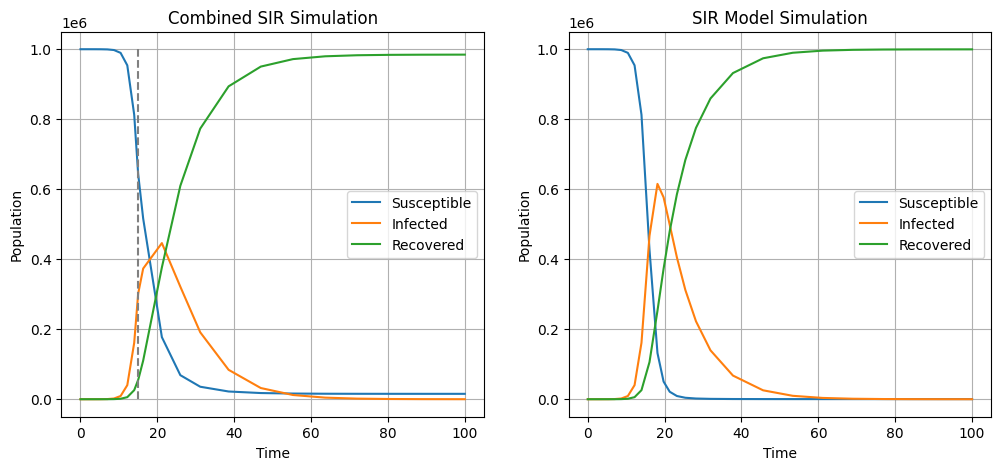

In [7]:
compute_and_plot_sim_with_and_without_measure()

In [8]:
total_time = 100
def wrapper_for_interaction(day_of_measure):
    compute_and_plot_sim_with_and_without_measure(pop_size = 1_000_000,
                                                  initial_infected = 1,
                                                  beta = 0.5,
                                                  beta_reduction_factor = 2,
                                                  gamma = 0.125,
                                                  total_time=total_time,
                                                  day_of_measure=day_of_measure)
    

interact(
    wrapper_for_interaction,
    day_of_measure=IntSlider(value=5, min=0, max=total_time, step=1, description='time of setting measure')
)

interactive(children=(IntSlider(value=5, description='time of setting measure'), Output()), _dom_classes=('wid…

<function __main__.wrapper_for_interaction(day_of_measure)>

In [9]:
# SEQIAHR model 
m = SEQIAHR()
md(str(m))

\begin{array}{l} \mathopen{}\left( S, E, I, A, H, R, C, D \mathclose{}\right) = y \\ \mathopen{}\left( \chi, \phi, \beta, \rho, \delta, \gamma, \alpha, \mu, p, q, r, N \mathclose{}\right) = \mathrm{params}.\mathrm{values} \mathopen{}\left( \mathclose{}\right) \\ \mathrm{lamb} = \beta \cdot \mathopen{}\left( I + A \mathclose{}\right) \\ \chi = \chi \frac{1 + \tanh \mathopen{}\left( t - q \mathclose{}\right)}{2} \frac{1 - \tanh \mathopen{}\left( t - \mathopen{}\left( q + r \mathclose{}\right) \mathclose{}\right)}{2} \\ \mathrm{SEQIAHR}(\mathrm{self}, t, y, \mathrm{params}) = \mathopen{}\left[ -\mathrm{lamb} \cdot \mathopen{}\left( 1 - \chi \mathclose{}\right) S, \mathrm{lamb} \cdot \mathopen{}\left( 1 - \chi \mathclose{}\right) S - \alpha E, \mathopen{}\left( 1 - p \mathclose{}\right) \alpha E - \delta I - \phi I, p \alpha E - \gamma A, \phi I - \mathopen{}\left( \rho + \mu \mathclose{}\right) H, \delta I + \rho H + \gamma A, \phi I, \mu H \mathclose{}\right] \end{array}

\begin{array}{l} \mathopen{}\left( S, E, I, A, H, R, C, D \mathclose{}\right) = y \\ \mathopen{}\left( \chi, \phi, \beta, \rho, \delta, \gamma, \alpha, \mu, p, q, r, N \mathclose{}\right) = \mathrm{params}.\mathrm{values} \mathopen{}\left( \mathclose{}\right) \\ \mathrm{lamb} = \beta \cdot \mathopen{}\left( I + A \mathclose{}\right) \\ \chi = \chi \frac{1 + \tanh \mathopen{}\left( t - q \mathclose{}\right)}{2} \frac{1 - \tanh \mathopen{}\left( t - \mathopen{}\left( q + r \mathclose{}\right) \mathclose{}\right)}{2} \\ \mathrm{SEQIAHR}(\mathrm{self}, t, y, \mathrm{params}) = \mathopen{}\left[ -\mathrm{lamb} \cdot \mathopen{}\left( 1 - \chi \mathclose{}\right) S, \mathrm{lamb} \cdot \mathopen{}\left( 1 - \chi \mathclose{}\right) S - \alpha E, \mathopen{}\left( 1 - p \mathclose{}\right) \alpha E - \delta I - \phi I, p \alpha E - \gamma A, \phi I - \mathopen{}\left( \rho + \mu \mathclose{}\right) H, \delta I + \rho H + \gamma A, \phi I, \mu H \mathclose{}\right] \end{array}


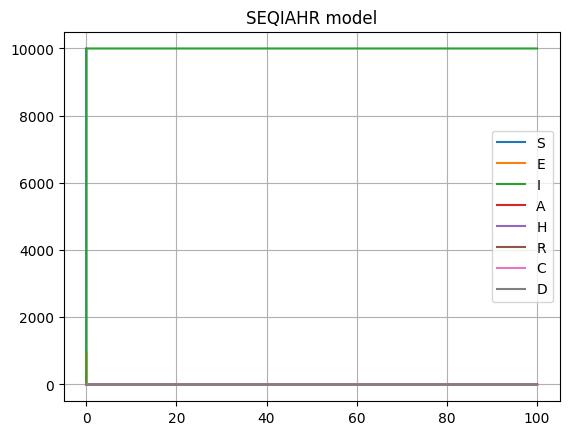

In [10]:
# SEQIAHR model test
total_time = 100
population_size = 10_000

m = SEQIAHR()
I = 1
E = 0
S = population_size - I - E
A = 0
H = 0
R = 0
C = 0
D = 0

print(m)

init = [S, E, I, A, H, R, C, D]
time_frame = [0, total_time]
params = {
    'chi': 0,       # how much of exposed get quarantined
    'phi': 0,       # how quickly symptomatic are removed
    'beta': 0.05,    # transmission rate
    'rho': 0.00,    # hospitalized recovery rate
    'delta': 0,     # symptomatic detection rate
    'gamma': 10000,     # asymptomatic recovery rate
    'alpha': 1000,     # incubation rate (1/incubation days)
    'mu': 0.00,     # hospital death rate
    'p': 0,         # proportion asymptomatic
    'q': 100,         # time of quarantine ramp-up
    'r': 20         # ramp steepness
}
m(init, time_frame, population_size, params)
m.plot_traces()
a = m.run(init, time_frame, population_size, params)

In [11]:
S,E,I,A,H,R,C,D = a.y
print(E[10])

36.591941689168266
